In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

Images with label 1:


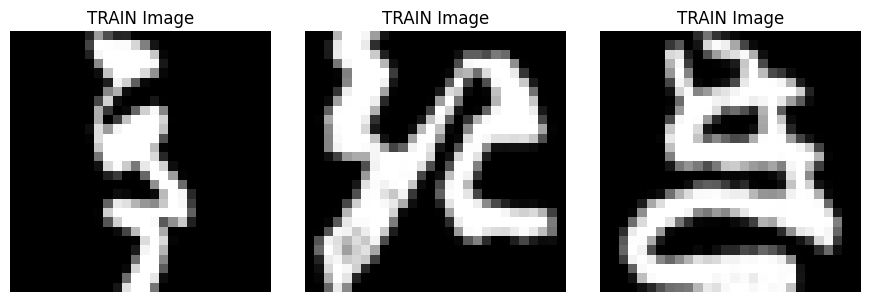

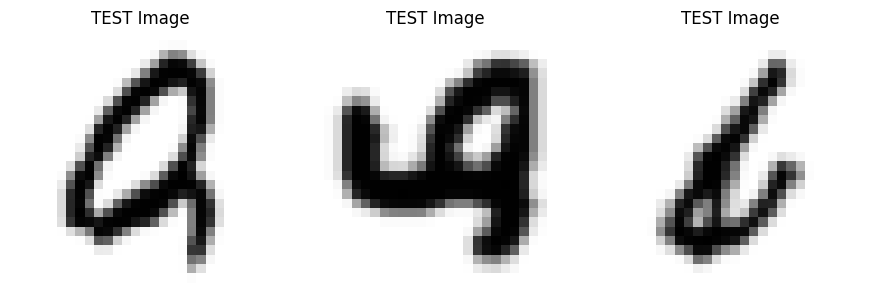

Images with label 2:


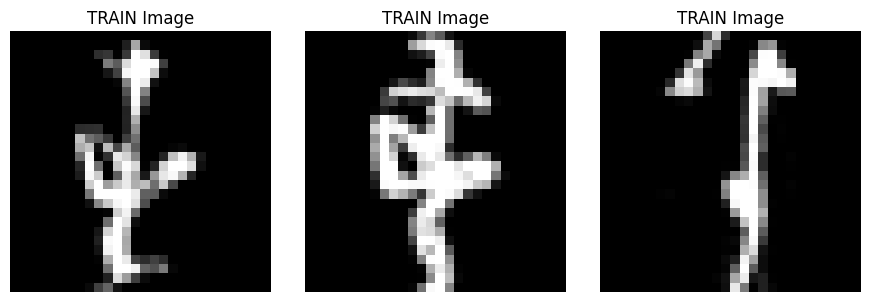

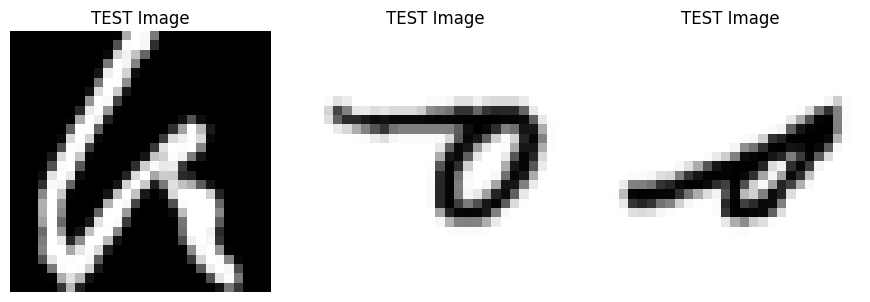

Images with label 3:


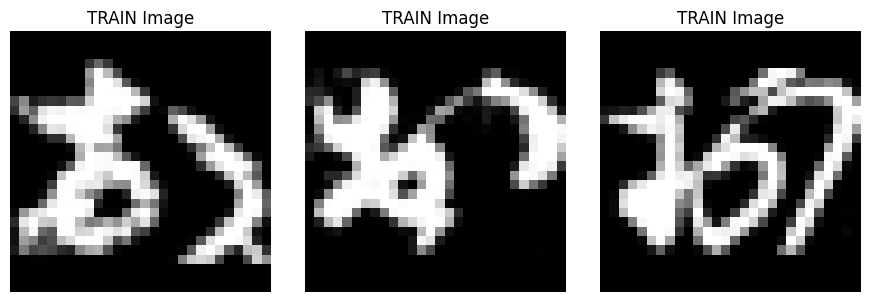

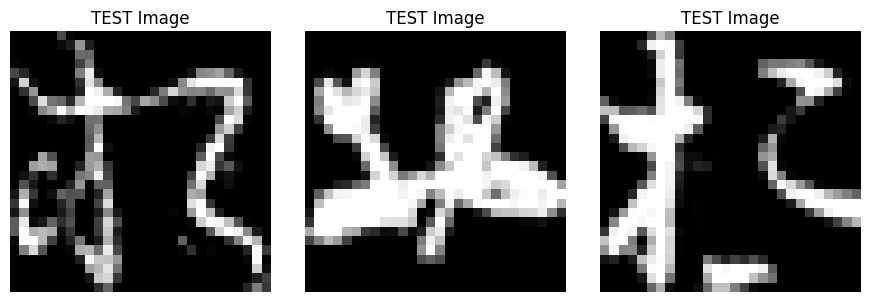

Images with label 6:


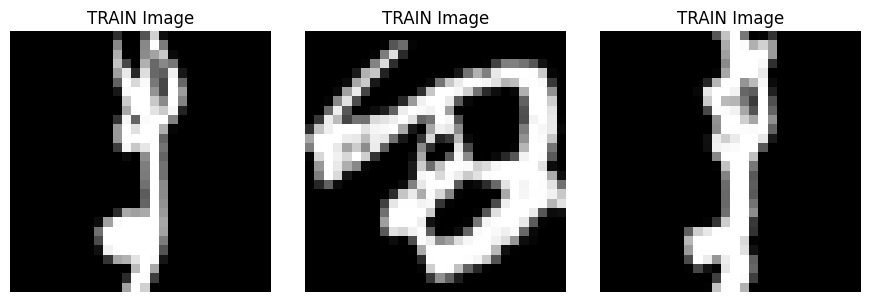

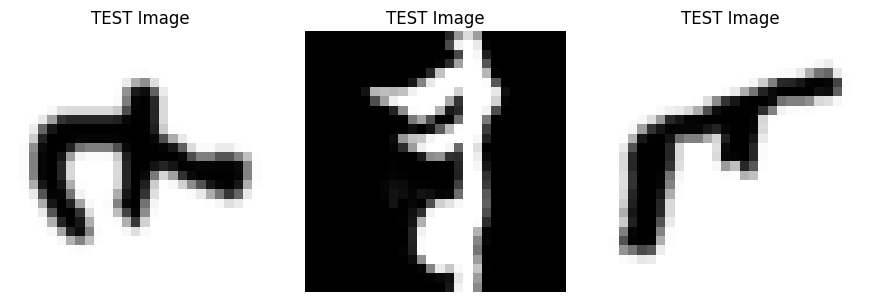

In [3]:
def show_image(image_paths, image_type):
    # Create a figure with the required number of columns
    fig, axes = plt.subplots(1, len(image_paths), figsize=(len(image_paths) * 3, 3))
    
    # Load and display each image
    for ax, image_path in zip(axes, image_paths):
        img = np.load(image_path)
        # print(f"Image shape: {img.shape}")

        img = img[0]  # Convert to (H, W) for display
        
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        ax.set_title(f"{image_type} Image")
    
    # Show the final result
    plt.tight_layout()
    plt.show()

print("Images with label 1:")
train_image_paths = ["./TRAIN/1/train_img_0.npy", "./TRAIN/1/train_img_2.npy", "./TRAIN/1/train_img_3.npy", "./TRAIN/1/train_img_4.npy", "./TRAIN/1/train_img_3000.npy", "./TRAIN/1/train_img_3001.npy", "./TRAIN/1/train_img_3002.npy", "./TRAIN/1/train_img_3.npy", "./TRAIN/1/train_img_3004.npy",  "./TRAIN/1/train_img_599.npy", "./TRAIN/1/train_img_5996.npy", "./TRAIN/1/train_img_5997.npy", "./TRAIN/1/train_img_5998.npy", "./TRAIN/1/train_img_5999.npy"] 
show_image(train_image_paths, "TRAIN")

test_image_paths = ["./TEST/1/tst_img_0.npy", "./TEST/1/tst_img_2.npy", "./TEST/1/tst_img_3.npy"]
show_image(test_image_paths, "TEST")

print("Images with label 2:")

train_image_paths2 = ["./TRAIN/2/train_img_6000.npy", "./TRAIN/2/train_img_6002.npy", "./TRAIN/2/train_img_6003.npy", "./TRAIN/2/train_img_6004.npy", "./TRAIN/2/train_img_9000.npy", "./TRAIN/2/train_img_9001.npy", "./TRAIN/2/train_img_9002.npy", "./TRAIN/2/train_img_9003.npy", "./TRAIN/2/train_img_9004.npy",  "./TRAIN/2/train_img_11995.npy", "./TRAIN/2/train_img_11996.npy", "./TRAIN/2/train_img_11997.npy", "./TRAIN/2/train_img_11998.npy", "./TRAIN/2/train_img_11999.npy"]
show_image(train_image_paths2, "TRAIN")

test_image_paths2 = ["./TEST/2/tst_img_1000.npy", "./TEST/2/tst_img_1001.npy", "./TEST/2/tst_img_1002.npy"]
show_image(test_image_paths2, "TEST")

print("Images with label 3:")

test_image_paths3 = ["./TRAIN/3/train_img_12000.npy", "./TRAIN/3/train_img_12002.npy", "./TRAIN/3/train_img_12003.npy", "./TRAIN/3/train_img_12004.npy", "./TRAIN/3/train_img_15000.npy", "./TRAIN/3/train_img_15001.npy", "./TRAIN/3/train_img_15002.npy", "./TRAIN/3/train_img_15003.npy", "./TRAIN/3/train_img_15004.npy",  "./TRAIN/3/train_img_17995.npy", "./TRAIN/3/train_img_17996.npy", "./TRAIN/3/train_img_17997.npy", "./TRAIN/3/train_img_17998.npy", "./TRAIN/3/train_img_17999.npy"]
show_image(test_image_paths3, "TEST")






print("Images with label 6:")

train_image_paths6 = ["./TRAIN/6/train_img_30000.npy", "./TRAIN/6/train_img_30001.npy", "./TRAIN/6/train_img_30002.npy"]
show_image(train_image_paths6, "TRAIN")

test_image_paths6 = ["./TEST/6/tst_img_5000.npy", "./TEST/6/tst_img_5001.npy", "./TEST/6/tst_img_5002.npy"]
show_image(test_image_paths6, "TEST")

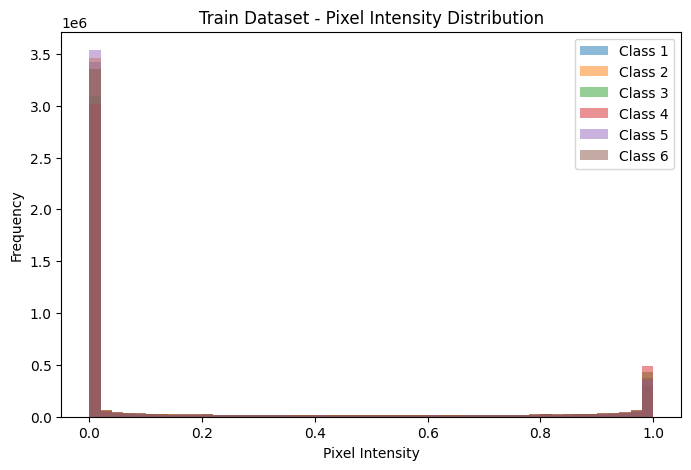

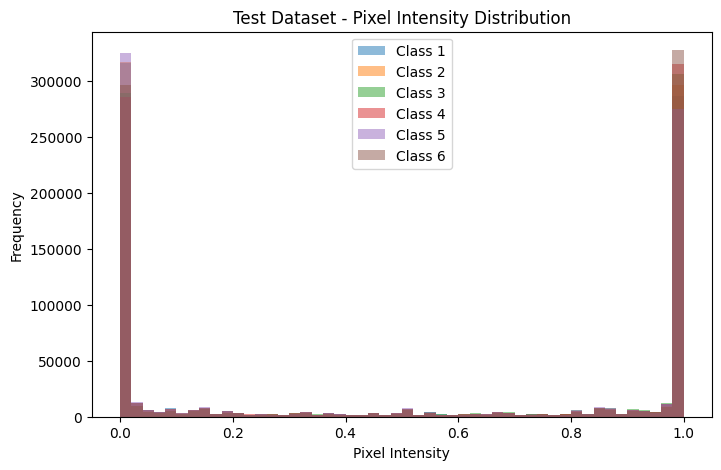

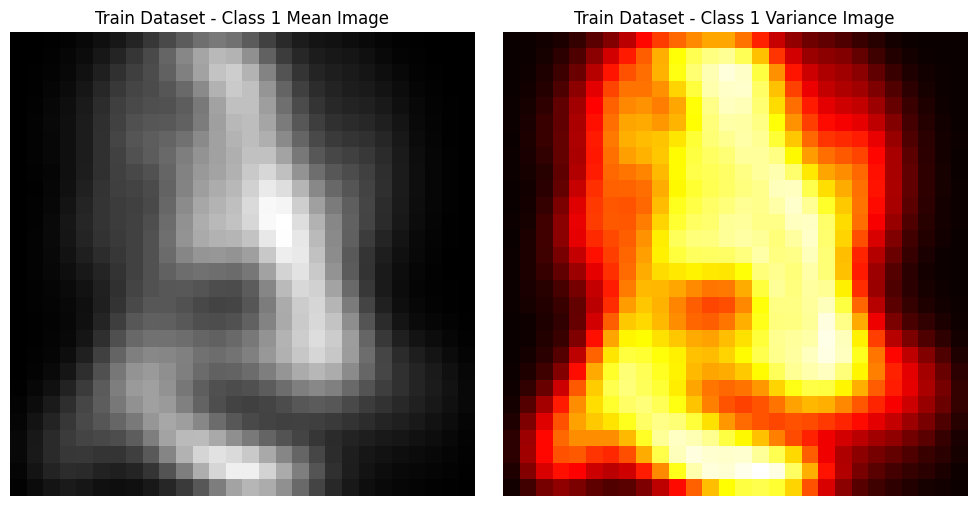

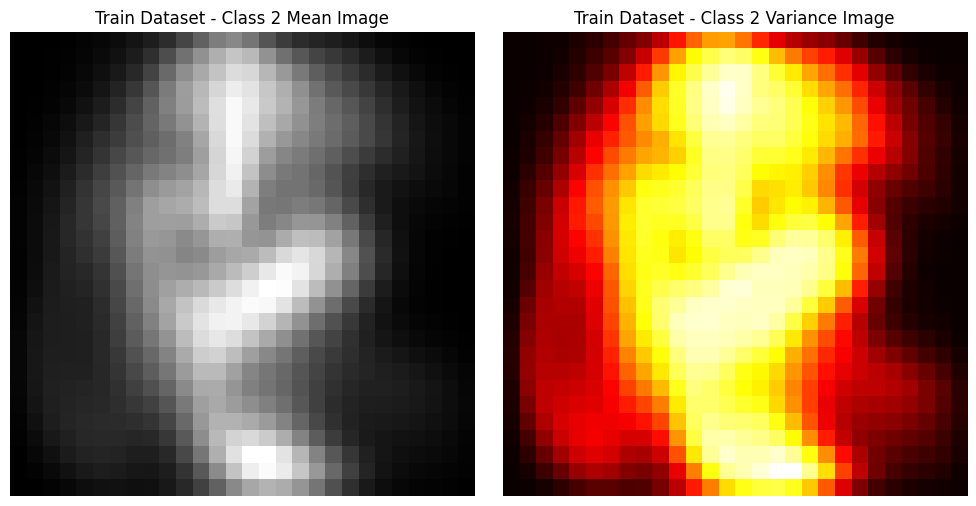

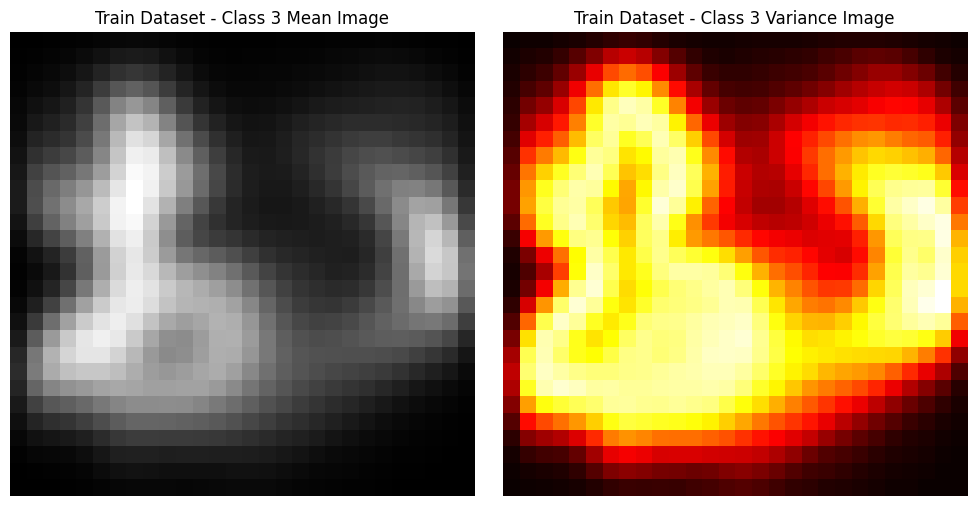

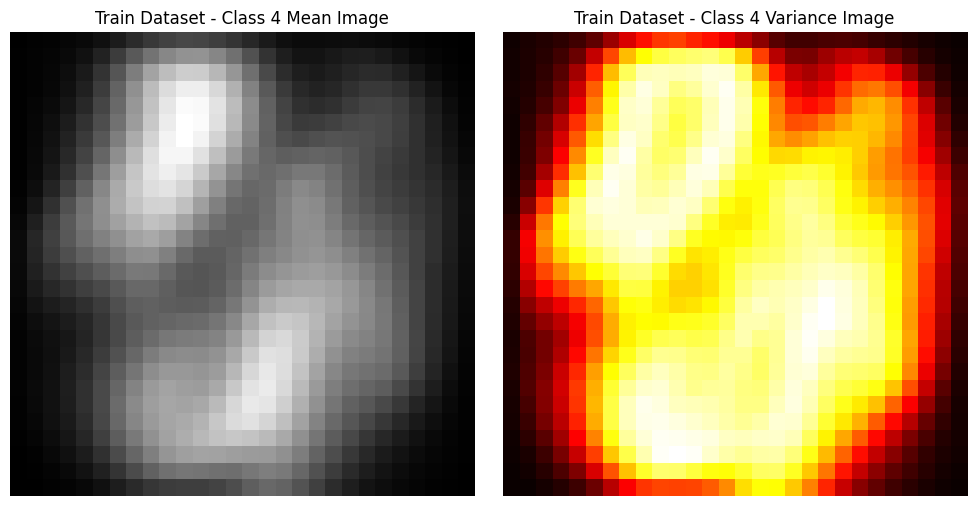

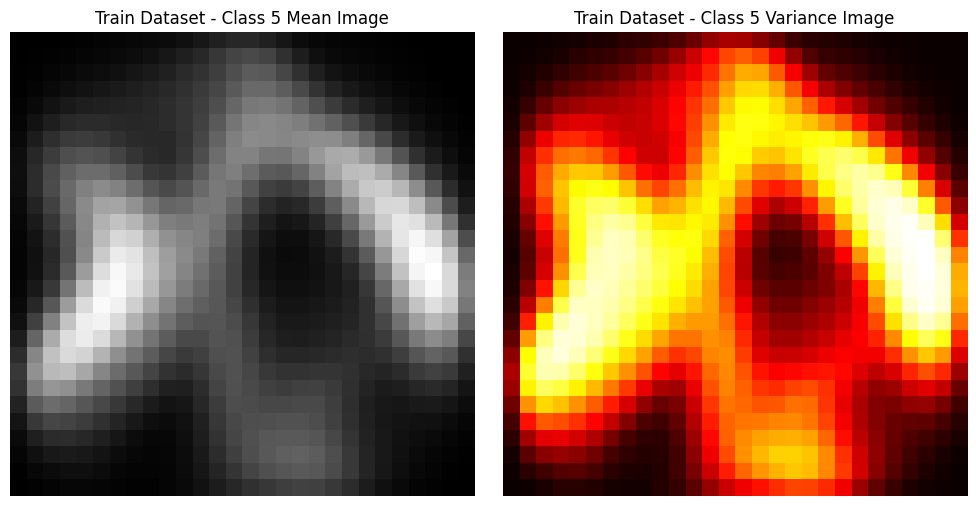

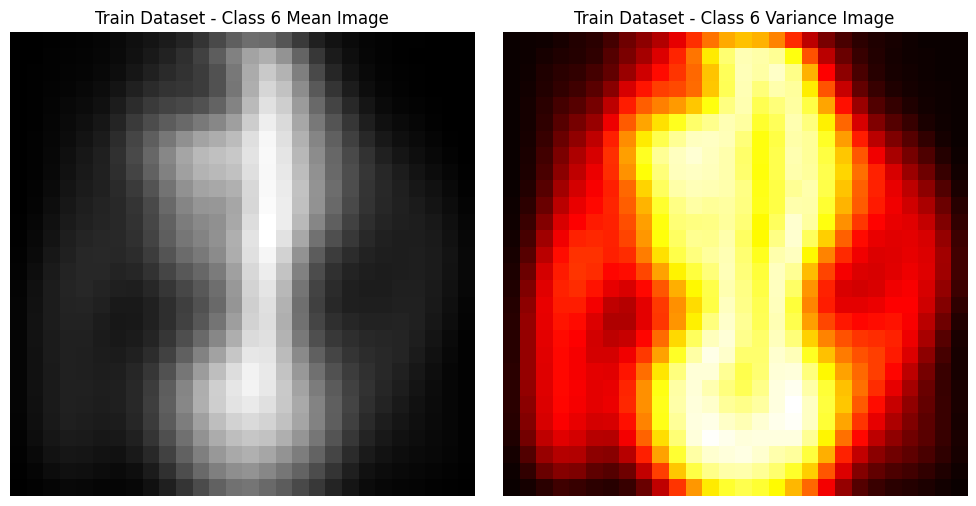

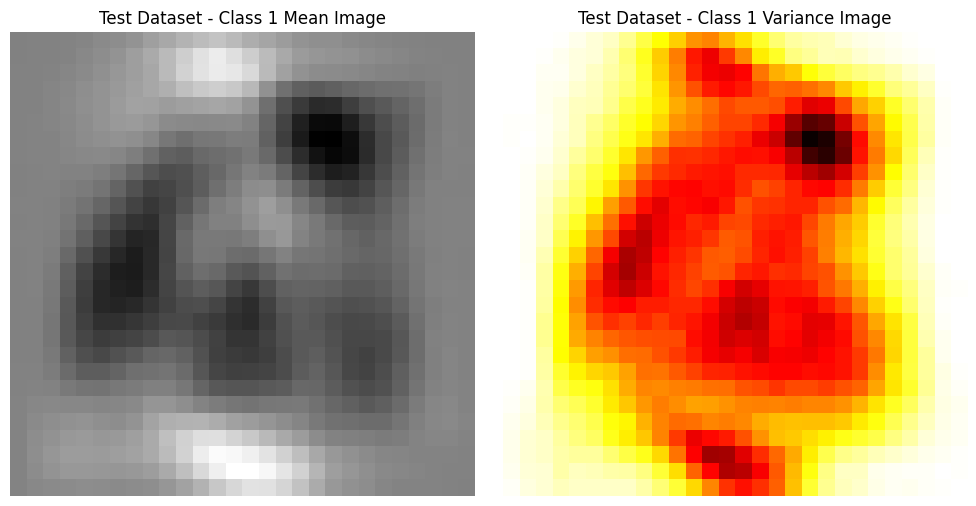

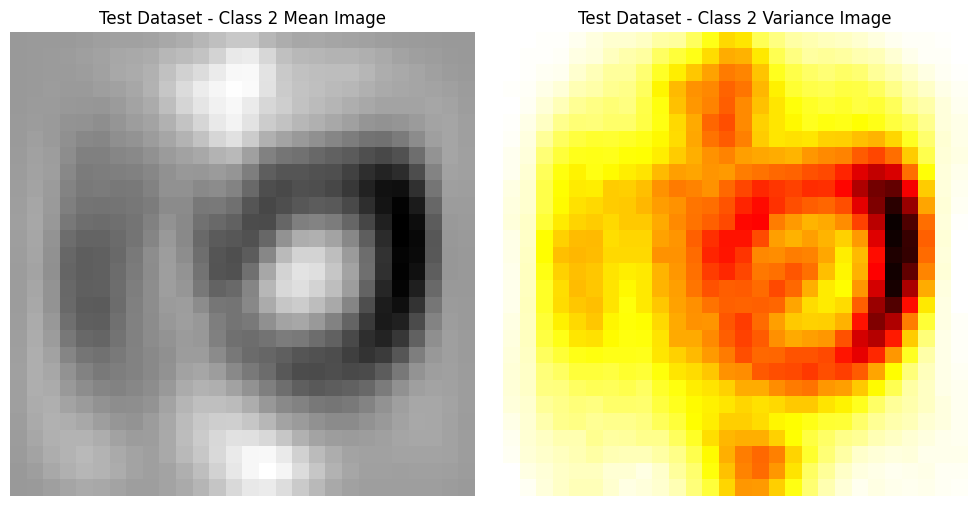

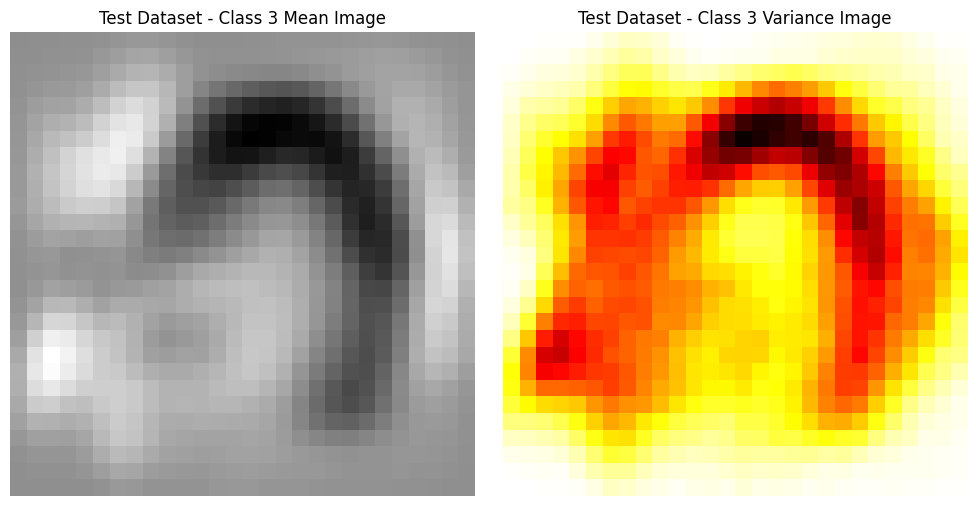

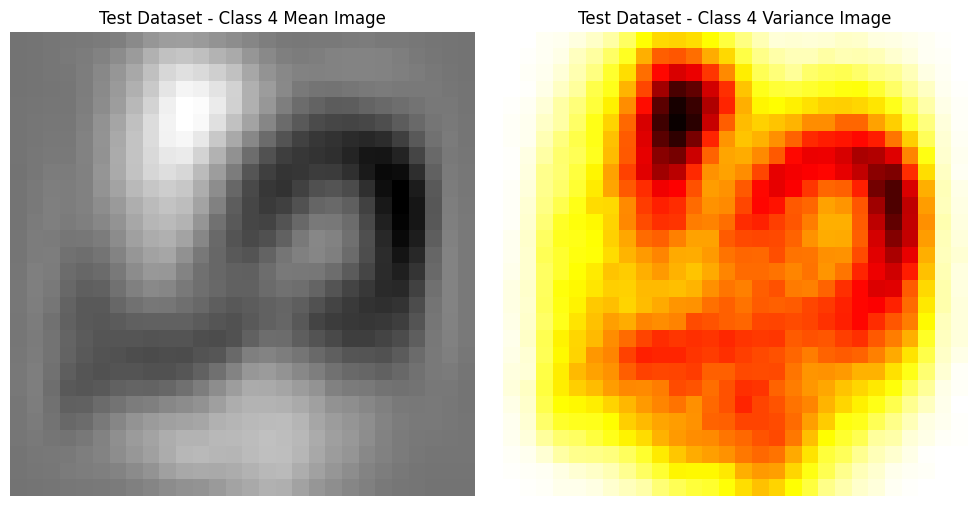

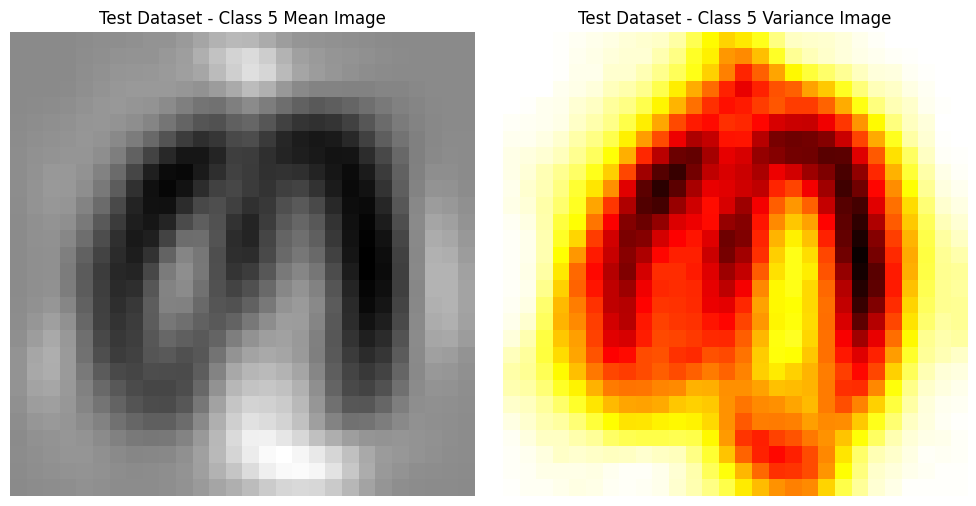

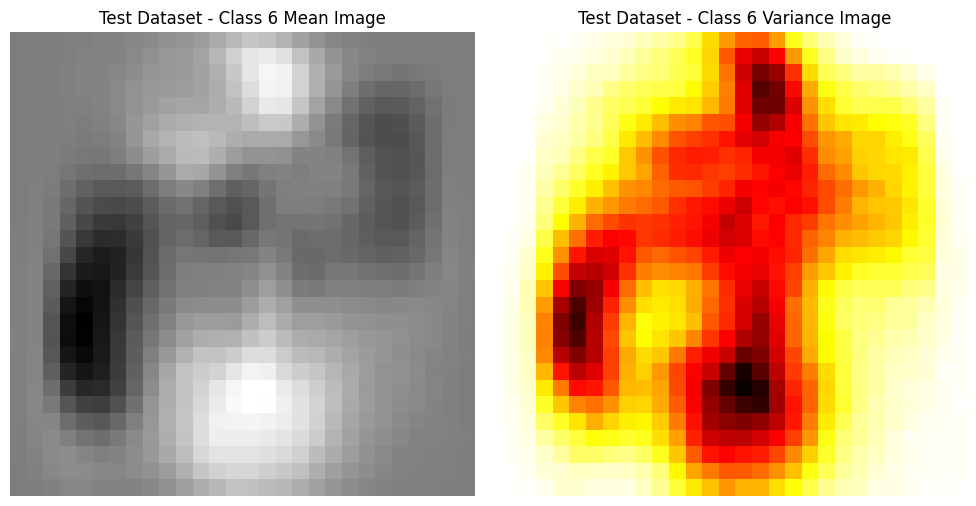

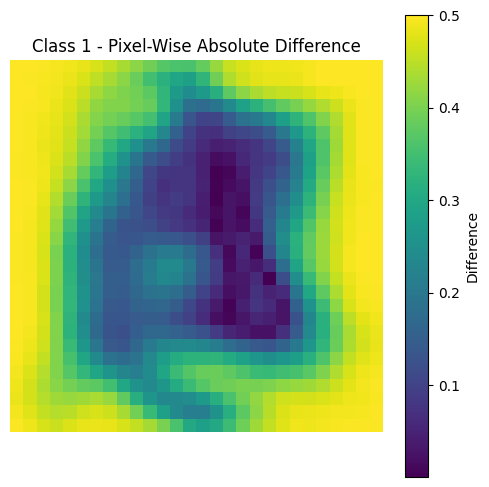

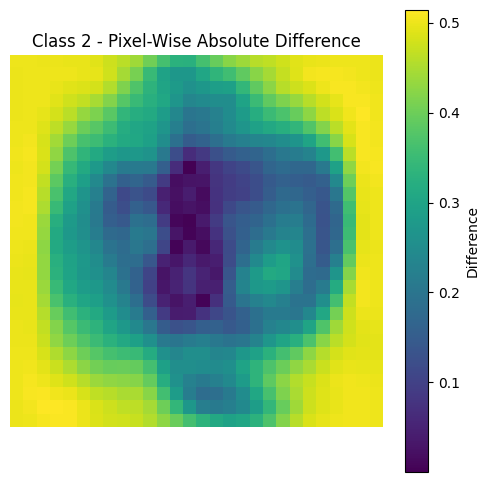

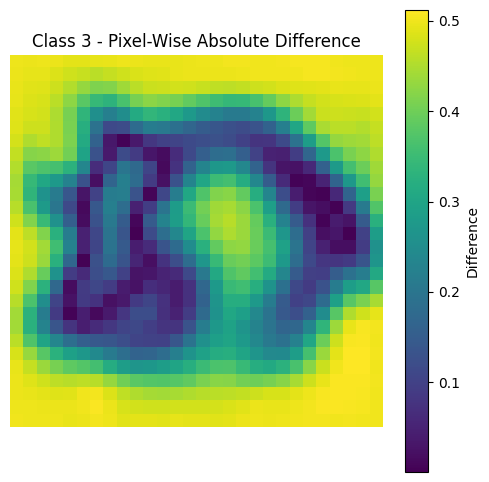

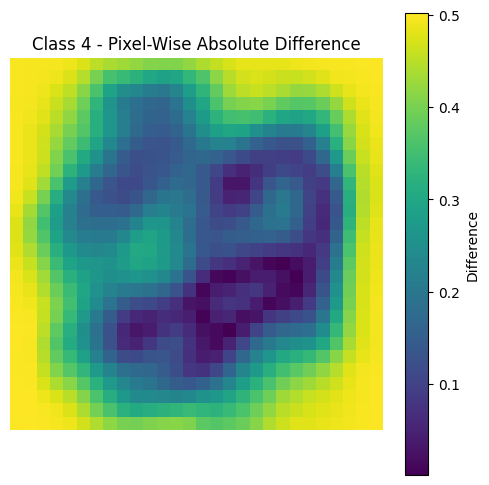

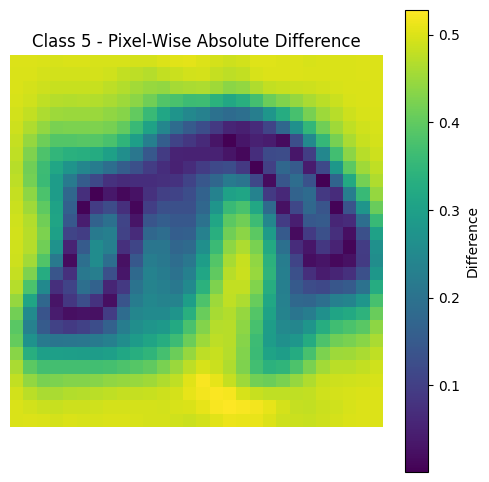

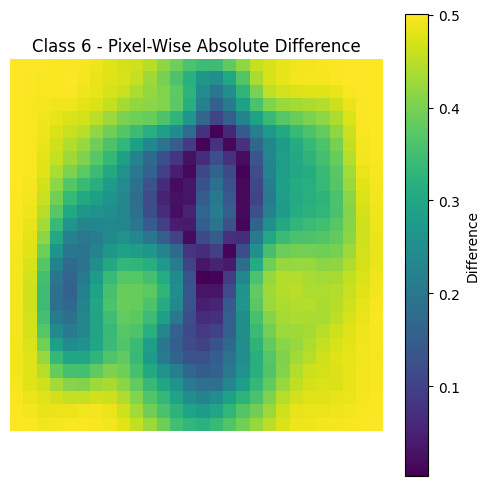

In [4]:


# Helper functions

def load_images_from_folder(folder_path, num_classes, prefix):
    all_images = []
    for class_idx in range(1, num_classes + 1):
        class_folder = os.path.join(folder_path, str(class_idx))
        images = []
        for filename in sorted(os.listdir(class_folder)):
            if filename.startswith(prefix) and filename.endswith('.npy'):
                file_path = os.path.join(class_folder, filename)
                images.append(np.load(file_path))
        all_images.append(images)
    return all_images

def plot_pixel_intensity_distribution(images, title):
    plt.figure(figsize=(8, 5))
    for i, img_set in enumerate(images):
        combined_images = np.concatenate([img.flatten() for img in img_set])
        plt.hist(combined_images, bins=50, alpha=0.5, label=f"Class {i+1}")
    plt.title(f"{title} - Pixel Intensity Distribution")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

def compute_mean_variance(images):
    mean_images = []
    variance_images = []
    for img_set in images:
        stacked_images = np.stack([img[0] for img in img_set], axis=0)
        mean_images.append(np.mean(stacked_images, axis=0))
        variance_images.append(np.var(stacked_images, axis=0))
    return mean_images, variance_images

def plot_mean_variance(mean_images, variance_images, title):
    for i, (mean_image, variance_image) in enumerate(zip(mean_images, variance_images)):
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(mean_image, cmap='gray')
        plt.title(f"{title} - Class {i+1} Mean Image")
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(variance_image, cmap='hot')
        plt.title(f"{title} - Class {i+1} Variance Image")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

def plot_pixel_wise_difference(train_images, test_images):
    for i, (train_set, test_set) in enumerate(zip(train_images, test_images)):
        train_stack = np.stack([img[0] for img in train_set], axis=0)
        test_stack = np.stack([img[0] for img in test_set], axis=0)

        train_mean = np.mean(train_stack, axis=0)
        test_mean = np.mean(test_stack, axis=0)

        difference = np.abs(train_mean - test_mean)

        plt.figure(figsize=(6, 6))
        plt.imshow(difference, cmap='viridis')
        plt.title(f"Class {i+1} - Pixel-Wise Absolute Difference")
        plt.colorbar(label="Difference")
        plt.axis('off')
        plt.show()

# Set up paths and load data
train_folder = './TRAIN'  # Update with the actual train folder path
test_folder = './TEST'  # Update with the actual test folder path
num_classes = 6

train_images = load_images_from_folder(train_folder, num_classes, prefix='train_img_')
test_images = load_images_from_folder(test_folder, num_classes, prefix='tst_img_')

# Plot pixel intensity distribution
plot_pixel_intensity_distribution(train_images, "Train Dataset")
plot_pixel_intensity_distribution(test_images, "Test Dataset")

# Compute and plot mean and variance images for train and test datasets
train_mean_images, train_variance_images = compute_mean_variance(train_images)
plot_mean_variance(train_mean_images, train_variance_images, "Train Dataset")

test_mean_images, test_variance_images = compute_mean_variance(test_images)
plot_mean_variance(test_mean_images, test_variance_images, "Test Dataset")

# Plot pixel-wise comparison between train and test datasets
plot_pixel_wise_difference(train_images, test_images)
